In [1]:
import numpy as np
import pandas as pd
from keras.utils import np_utils
np.random.seed(10)

Using TensorFlow backend.


In [2]:
from keras.datasets import mnist

In [5]:
(X_train_image, Y_train_label),(X_test_image, Y_test_label) = mnist.load_data()

In [9]:
print(len(X_train_image))
print(len(X_test_image))
print(X_train_image.shape)
print(Y_train_label.shape)

60000
10000
(60000, 28, 28)
(60000,)


In [13]:
import matplotlib.pyplot as plt
def plot_image(image):
    fig = plt.gcf()
    fig.set_size_inches(2, 2)
    plt.imshow(image, cmap='binary')
    plt.show()

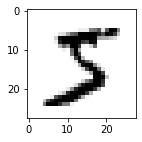

In [16]:
plot_image(X_train_image[0])

In [17]:
print(Y_train_label[0])

5


In [19]:
def plot_images_labels_prediction(images, labels, prediction, idx, num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num > 25: num = 25
    for i in range(0, num):
        ax = plt.subplot(5, 5, i+1)
        ax.imshow(images[idx], cmap='binary')
        title = 'label=' + str(labels[idx])
        if len(prediction) > 0:
            title += ',prediction=' + str(prediction[idx])
        ax.set_title(title, fontsize=10)
        ax.set_xticks([])
        ax.set_yticks([])
        idx += 1
    plt.show()

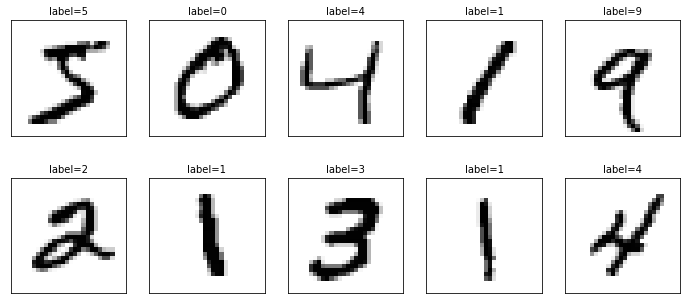

In [21]:
plot_images_labels_prediction(X_train_image, Y_train_label, [], 0, 10)

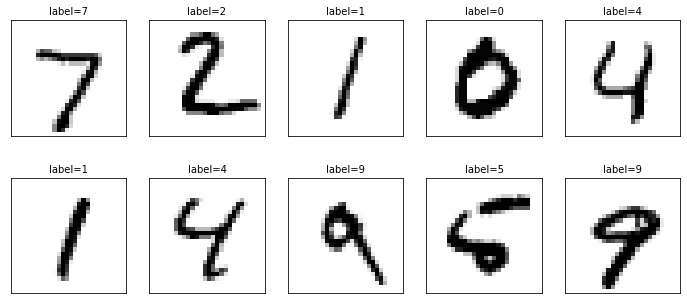

In [22]:
plot_images_labels_prediction(X_test_image, Y_test_label, [], 0, 10)

In [25]:
X_train = X_train_image.reshape(60000, 784).astype('float32')
X_test = X_test_image.reshape(10000, 784).astype('float32')

In [27]:
print(X_train.shape)

(60000, 784)


In [28]:
X_train_normalize = X_train / 255
X_test_normalize = X_test /255

In [29]:
Y_train_onehot = np_utils.to_categorical(Y_train_label)
Y_test_onehot = np_utils.to_categorical(Y_test_label)

In [54]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [66]:
model = Sequential()
model.add(Dense(units=1000,input_dim=784, kernel_initializer='normal', activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1000, kernel_initializer='normal', activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=10, kernel_initializer='normal', activation='softmax'))

In [67]:
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 1000)              785000    
_________________________________________________________________
dropout_2 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 1000)              1001000   
_________________________________________________________________
dropout_3 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                10010     
Total params: 1,796,010
Trainable params: 1,796,010
Non-trainable params: 0
_________________________________________________________________
None


In [68]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [69]:
train_history = model.fit(x=X_train_normalize, y=Y_train_onehot, 
                          validation_split=0.2, epochs=10, batch_size=200, verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 5s - loss: 0.3746 - acc: 0.8829 - val_loss: 0.1334 - val_acc: 0.9608
Epoch 2/10
 - 4s - loss: 0.1595 - acc: 0.9501 - val_loss: 0.1032 - val_acc: 0.9683
Epoch 3/10
 - 4s - loss: 0.1203 - acc: 0.9624 - val_loss: 0.0910 - val_acc: 0.9722
Epoch 4/10
 - 4s - loss: 0.0987 - acc: 0.9689 - val_loss: 0.0800 - val_acc: 0.9767
Epoch 5/10
 - 4s - loss: 0.0829 - acc: 0.9740 - val_loss: 0.0788 - val_acc: 0.9772
Epoch 6/10
 - 4s - loss: 0.0745 - acc: 0.9759 - val_loss: 0.0805 - val_acc: 0.9769
Epoch 7/10
 - 4s - loss: 0.0654 - acc: 0.9789 - val_loss: 0.0730 - val_acc: 0.9790
Epoch 8/10
 - 5s - loss: 0.0615 - acc: 0.9810 - val_loss: 0.0700 - val_acc: 0.9798
Epoch 9/10
 - 4s - loss: 0.0573 - acc: 0.9812 - val_loss: 0.0756 - val_acc: 0.9784
Epoch 10/10
 - 5s - loss: 0.0508 - acc: 0.9834 - val_loss: 0.0778 - val_acc: 0.9793


In [36]:
def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

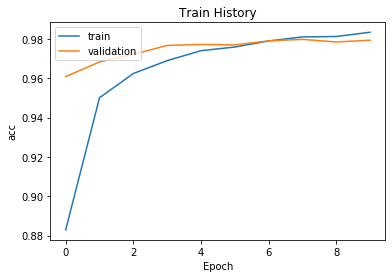

In [70]:
show_train_history(train_history, 'acc', 'val_acc')

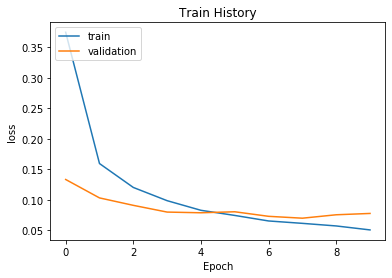

In [71]:
show_train_history(train_history, 'loss', 'val_loss')

In [72]:
scores = model.evaluate(X_test_normalize, Y_test_onehot)
print()
print('accuracy={}'.format(scores[1]))

10000/10000 [==============================] - 0s 42us/step

accuracy=0.9802


In [73]:
prediction = model.predict_classes(X_test)


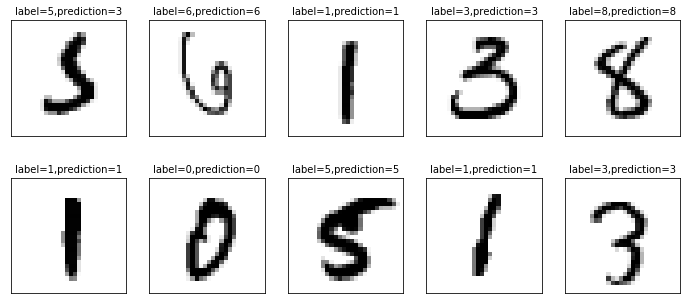

In [74]:
plot_images_labels_prediction(X_test_image, Y_test_label, prediction, idx=340)

In [75]:
pd.crosstab(Y_test_label, prediction, rownames=['label'], colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,972,1,0,0,1,0,2,1,3,0
1,0,1126,2,1,0,2,2,0,2,0
2,3,0,1019,0,1,0,2,6,1,0
3,0,0,5,989,0,7,0,4,2,3
4,2,1,2,0,959,0,5,1,0,12
5,3,0,0,7,1,876,3,0,1,1
6,4,2,0,1,3,10,938,0,0,0
7,1,6,9,2,0,1,0,1005,1,3
8,4,0,8,8,1,8,2,7,933,3


In [76]:
df = pd.DataFrame({'label': Y_test_label, 'predict': prediction})
df[:2]

,label,predict
0,7,7
1,2,2


In [77]:
df[(df.label==5)&(df.predict==3)]

,label,predict
340,5,3
1393,5,3
2035,5,3
2810,5,3
3702,5,3
4271,5,3
5937,5,3
